In [1]:
from __future__ import print_function
# importing the natural language tool kit
import nltk
# needed for tokenizing the dataset
nltk.download('punkt')
# importing the regular expression
import re
# importing the numpy library to work with and manipulate the data
import numpy as np
# import the pandas library to read our dataset
import pandas as pd
# importing the sys library which can perform introspection about the system 
import sys
# importing the os library to interact with our operating system
import os
# importing the load_model and model
from keras.models import load_model, Model
# importing the Bidirectional, Dense, TimeDistributed, LSTM, Embedding and Input layers
from keras.layers import Bidirectional, Dense, TimeDistributed, LSTM, Embedding, Input
# setting the output length
OUTPUT_LENGTH = 20
# setting the output length
INPUT_LENGTH = 20

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
# it is for data loading
# Reading two .txt files 
raw_movie_lines = open('movie_lines.txt', encoding='utf-8', errors='ignore').read().split('\n') # The path to .txt file
raw_movie_conv_lines = open('movie_conversations.txt', encoding='utf-8', errors='ignore').read().split('\n')
# it is for mapping each line id with its corresponding text by creating a dictionary
ansid = {}
# reading lines from raw_movoe_lines dataset
for line in raw_movie_lines:
    # splitting the lines and assigning to _line
    _line = line.split(' +++$+++ ')
    # if the len of line is equal to 5 then the below condition executes
    if len(_line) == 5:
        ansid[_line[0]] = _line[4]
# Creating a list for all the conversations lines id's 
convs = []
# reading the lines from raw_movie_conv_lines dataset
for line in raw_movie_conv_lines[:-1]:
    # splitting the lines and assigning to _line
    _line = line.split(' +++$+++ ')[-1][1:-1].replace("'","").replace(" ","")
    # appending those splitted lines to conversations
    convs.append(_line.split(','))
# few set of id's and conversations 
for k in convs[300]:
    # print the value of k
    print (k, ansid[k])

L3490 That's what he did to me.  He put cigarettes out on me.
L3491 Your father put cigarettes out on you?
L3492 Out on my back when I was a small boy.
L3493 Can I see your back?


In [3]:
# We need to perform the sorting operations on sentences to questions and on answers 
# For questions
ques = []
# For Answers
ans = []
# for conversation in conversations
for conv in convs:
    for i in range(len(conv)-1):
        # appending the conversations ids to the questions
        ques.append(ansid[conv[i]])
        # appending the conversations ids to the answers
        ans.append(ansid[conv[i+1]])
# We need to Compare both the lengths of questions and answers
# printing the length of the questions
print(len(ques))
# printing the length of the answers
print(len(ans))

221616
221616


In [4]:
# A method for cleaning the text 
def clean_text(text):
    # it will be cleaning the text by removing all the unnedded characters and changing the words and characters format
    # converting the text to the lower case letters
    text = text.lower()
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"i'm", "i am", text)
    # splitting the text and joining the text to the text
    text = " ".join(text.split())
    # returning the text
    return text
# Cleaning the data which contains both questions and answers
# For cleaning the questions
clean_questions = []
for question in ques:
    # cleaning the questions and appending them to the clean_questions
    clean_questions.append(clean_text(question))
# For Cleaning the answers
clean_answers = []    
for answer in ans:
    # cleaning the answers and appending them to the clean_answers
    clean_answers.append(clean_text(answer))
# After performing the clean opeartion on both questions and answers we need to find the length of the sentence
# We are finding the length of sentences and we are not using the natural language tool kit during this process
senlen = []
for question in clean_questions:
    # splitting and finding the length of the questions and then finally append it to the senlen
    senlen.append(len(question.split()))
for answer in clean_answers:
    # splitting and finding the length of the answers and then finally append it to the senlen
    senlen.append(len(answer.split()))
# Need to create a dataframe which can be helpful in inspecting the values
senlen = pd.DataFrame(senlen, columns=['counts'])
print(np.percentile(senlen, 80))
print(np.percentile(senlen, 85))
print(np.percentile(senlen, 90))
print(np.percentile(senlen, 95))

16.0
19.0
24.0
32.0


In [5]:
# We need to remove both question and answers that are shorter than 1 word and larger than 20 words
# so minimum length is 2
minimum_length = 2
# so maximum length is 20
maximum_length = 20
# Then filter the question and answer that are too short (or) long
short_ques = []
short_ans = []
# for both index i and question in clean_questions
for i, question in enumerate(clean_questions):
    # checking the condition for length of the question is greater or equal to minimum_length and less than or equal to maximum_length 
    if len(question.split()) >= minimum_length and len(question.split()) <= maximum_length:
        # if the condition is true
        # then append the question to short questions
        short_ques.append(question)
        # if the condition is true
        # then append the answers to the short answers
        short_ans.append(clean_answers[i])
short_qu = []
short_an = []
# for both index i and answer in short_answers
for i, answer in enumerate(short_ans):
    # checking the conditon for the length of the answer is greater or equal to minimum_length and less than or equal to maximum_length
    if len(answer.split()) >= minimum_length and len(answer.split()) <= maximum_length:
        # if the condition is true
        # then append the answer to short answers
        short_an.append(answer)
        # if the condition is true
        # then append the question to short questions
        short_qu.append(short_ques[i])
# printing the length of the short question               
print(len(short_qu))
# printing the length of the short answer
print(len(short_an))

139603
139603


In [6]:
# np.random.randint is used for returning the random integers 
r = np.random.randint(1,len(short_qu))
for i in range(r, r+3):
    # printing the short questions
    print(short_qu[i])
    # printing the short answers
    print(short_an[i])
    print()

jillie, you want a cheese grilled sandwich?
it is called a grilled cheese sandwich, you dub.

his office. you mean my old office.
well, i guess -- that is what he said.

well, i guess -- that is what he said.
he got his deer yet?



In [7]:
# Preprocessing for word based model 
#choosing the number of samples for training
num_samples = 30000 
# Number of samples for short questions 
short_qu = short_qu[:num_samples]
# Number of samples to short answers
short_an = short_an[:num_samples]
# Applying the tokenizing on questions
questions_tokenize = [nltk.word_tokenize(sent) for sent in short_qu]
# Applying the tokenizing on answers
answers_tokenize = [nltk.word_tokenize(sent) for sent in short_an]

# splitting the training and validation
# assigning the length of the tokenized questions to the value
size_of_the_data = len(questions_tokenize)
# We are using 80 percent of the data for the training and assigning it to the input_train_data
input_train_data  = questions_tokenize[:round(size_of_the_data*(80/100))]
# We are reverseing the input sequence for a good performance
input_train_data  = [tr_input[::-1] for tr_input in input_train_data]
# assigning value to the output trained data 
output_train_data = answers_tokenize[:round(size_of_the_data*(80/100))]
# remaining 20% of the data is used for validations
# assigning the value to the input_validating_data
input_validating_data = questions_tokenize[round(size_of_the_data*(80/100)):]
# We are reverseing the input sequence for a good performance
input_validating_data  = [val_input[::-1] for val_input in input_validating_data]
# assigning the value to the output_validating_data
output_validating_data = answers_tokenize[round(size_of_the_data*(80/100)):]
# printing the size of the training data
print('The size of the training data', len(input_train_data))
# printing the size of the validation data
print('The size of the validation data', len(input_validating_data))

The size of the training data 24000
The size of the validation data 6000


In [8]:
# For vocabulary frequency we are creating a dictionary
vocabulary = {}
# for questions in questions_tokenize
for question in questions_tokenize:
    # for word in the question
    for word in question:
        # checking the condition if the word is not present in the vocabulary then assign 1
        if word not in vocabulary:
            vocabulary[word] = 1
        # if the word is present in the vocabulary then else part should get assigned
        else:
            vocabulary[word] += 1
# for answer in answers_tokenize
for answer in answers_tokenize:
    # for word in answer
    for word in answer:
         # checking the condition if the word is not present in the vocabulary then assign 1
        if word not in vocabulary:
            vocabulary[word] = 1
        # if the word is present in the vocabulary then else part should get assigned
        else:
            vocabulary[word] += 1
# We have to remove the rare words from the vocabulary and replace lesser than 5% of words with <UNK>
# assign thresholdvalue to 15
thresholdvalue = 15
# assign count to 0
count = 0
for k,v in vocabulary.items():
    # checking the condition if v is greater or equal to the thresholdvalue, then count gets increment
    if v >= thresholdvalue:
        count += 1
# printing the total size of the vocabulary       
print("Size of total vocabulary:", len(vocabulary))
# printing thr size of vocabulary in use
print("Size of vocabulary we will use:", count)

Size of total vocabulary: 16616
Size of vocabulary we will use: 1959


In [9]:

# assign word_start to 1
WORD_START = 1
# assign word_padding to 0
WORD_PADDING = 0
# assign numberofword to 2
numberoftheword  = 2
# for encoded_data
encoded_data = {}
# for decoded_data
decoded_data = {1: 'START'}
# for word and count in vocabulary.items()
for word, count in vocabulary.items():
    # checking the condition if count is greater or equal to the thresholdvalue
    if count >= thresholdvalue: 
        encoded_data[word] = numberoftheword 
        decoded_data[numberoftheword ] = word
        numberoftheword += 1
# printing the total number of vocabulary used
print("Total number of vocabulary used:", numberoftheword)

Total number of vocabulary used: 1961


In [10]:
# Dictionares are created which helps in providing the different integer for each and every word
# including the unknown tokens for words and not for dictionary
decoded_data[len(encoded_data)+2] = '<UNK>'
encoded_data['<UNK>'] = len(encoded_data)+2
# assigning the values to the dictionary_size
dictionary_size = numberoftheword+1
dictionary_size

1962

In [11]:
# Vectorizing the dataset
# method for data transformation with inputs encoded_data and sizeofthevector
# size of the vector is 20
def datatransformation(encoded_data, data, sizeofthevector=20):
    datatransformed = np.zeros(shape=(len(data), sizeofthevector))
    # for i in the range of the data length
    for i in range(len(data)):
        # for j in the range of minimum length of the data
        for j in range(min(len(data[i]), sizeofthevector)):
            try:
                datatransformed[i][j] = encoded_data[data[i][j]]
            except:
                datatransformed[i][j] = encoded_data['<UNK>']
    # returning the datatransformed
    return datatransformed

# encoding the data training set
# assigning the input trained data
inputtrainingencoded = datatransformation(encoded_data, input_train_data, sizeofthevector=INPUT_LENGTH)
# assigning the output trained data
outputtrainingencoded = datatransformation(encoded_data, output_train_data, sizeofthevector=OUTPUT_LENGTH)
# printing the input trained data
print('The input training encoded value is:', inputtrainingencoded.shape)
# printing the output trained data
print('The output training encoded value is', outputtrainingencoded.shape)

#encoding the data validation set
# assigning the input validation data
inputvalidationencoded = datatransformation(encoded_data, input_validating_data, sizeofthevector=INPUT_LENGTH)
# assigning the output validation data
outputvalidationencoded = datatransformation(encoded_data, output_validating_data, sizeofthevector=OUTPUT_LENGTH)
# printing the input validation data
print('The input validation encoded value is:', inputvalidationencoded.shape)
# printing the output validation data
print('The output validation encoded value is :', outputvalidationencoded.shape)

The input training encoded value is: (24000, 20)
The output training encoded value is (24000, 20)
The input validation encoded value is: (6000, 20)
The output validation encoded value is : (6000, 20)


In [12]:
# installing the tensorflow version of 1.14.0
!pip install tensorflow==1.14.0
# importing the tensorflow library
import tensorflow as tf
tf.keras.backend.clear_session()

In [13]:
# Building the model
# sequence-to-sequence operation in keras
# assigning the input_length to 20
INPUT_LENGTH = 20
# assigning the output_length to 20
OUTPUT_LENGTH = 20
# assigning the value to encodedinput
encodedinput = Input(shape=(INPUT_LENGTH,))
# assigning the value to decodedinput
decodedinput = Input(shape=(OUTPUT_LENGTH,))

# import SimpleRNN from keras.layers
from keras.layers import SimpleRNN
# assigning the Embedding layer and its parameters to the encoding
encoding = Embedding(dictionary_size, 128, input_length=INPUT_LENGTH, mask_zero=True)(encodedinput)
# assigning the LSTM layer and its parameters to the encoding
encoding = LSTM(512, return_sequences=True, unroll=True)(encoding)
# assigning the value to the lastencoding
lastencoding = encoding[:,-1,:]
# printing the encoding value
print('encoding', encoding)
# printing the lastencoding value
print('lastencoding', lastencoding)
# assigning the Embedding layer and its parameters to the decoding
decoding = Embedding(dictionary_size, 128, input_length=OUTPUT_LENGTH, mask_zero=True)(decodedinput)
# assigning the LSTM layer and its parameters to the decoding
decoding = LSTM(512, return_sequences=True, unroll=True)(decoding, initial_state=[lastencoding, lastencoding])
# printing the decoding value
print('decoding', decoding)

# import dot, concatenate and activation from keras.layers
from keras.layers import dot, concatenate, Activation
# assigning the value to the layerss
layerss = dot([decoding, encoding], axes=[2, 2])
layerss = Activation('softmax', name='layerss')(layerss)
# printing the layerss value
print('layerss', layerss)
layersss = dot([layerss, encoding], axes=[2,1])
# printing the layerss value
print('layerss', layerss)
concatenate_context = concatenate([layerss, decoding])
# printing the convatenate_context value
print('concatenate_context', concatenate_context)
# assigning the Dense layer and its parameters to the olayer with tanh activation function
olayer = TimeDistributed(Dense(512, activation="tanh"))(concatenate_context)
# assigning the Dense layer and its parameters to the olayer with softmax activation function
olayer = TimeDistributed(Dense(dictionary_size, activation="softmax"))(olayer)
# printing the olayer value
print('olayer', olayer)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
encoding Tensor("lstm_1/transpose_2:0", shape=(?, 20, 512), dtype=float32)
lastencoding Tensor("strided_slice:0", shape=(?, 512), dtype=float32)
decoding Tensor("lstm_2/transpose_2:0", shape=(?, 20, 512), dtype=float32)
layerss Tensor("layerss/truediv:0", shape=(?, 20, 20), dtype=float32)
layerss Tensor("layerss/truediv:0", shape=(?, 20, 20), dtype=float32)
concatenate_context Tensor("concatenate_1/concat:0", shape=(?, 20, 532), dtype=float32)
olayer Tensor("time_distributed_2/Reshape_1:0", shape=(?, 20, 1962), dtype=float32)


In [14]:
# assigning the Model and its parameters to the mtrain model variable
mtrain = Model(inputs=[encodedinput, decodedinput], outputs=[olayer])
# compile the mtrain model with adam optimizer and binary_crossentropy loss
mtrain.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summary of the mtrain model
mtrain.summary()



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 20, 128)      251136      input_2[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 20, 128)      251136      input_1[0][0]                    
__________________________________________________________________________________________

In [15]:
# assigning inputtrainingencoded to inputencodingtraining
inputencodingtraining = inputtrainingencoded
inputdecodingtraining = np.zeros_like(outputtrainingencoded)
inputdecodingtraining[:, 1:] = outputtrainingencoded[:,:-1]
# WORD_START to inputdecodingtraining
inputdecodingtraining[:, 0] = WORD_START
outputdecodingtraining = np.eye(dictionary_size)[outputtrainingencoded.astype('int')]
# assigning inputvalidationencoded to inputencodingvalidation
inputencodingvalidation = inputvalidationencoded
inputdecodingvalidation = np.zeros_like(outputvalidationencoded)
inputdecodingvalidation[:, 1:] = outputvalidationencoded[:,:-1]
# assigning WORD_START to inputdecodingvalidation
inputdecodingvalidation[:, 0] = WORD_START
outputdecodingvalidation = np.eye(dictionary_size)[outputvalidationencoded.astype('int')]

# assigning the batch_size=128, epochs=5 to mtrain model
#history=mtrain.fit(x=[inputencodingtraining, inputdecodingtraining], y=[outputdecodingtraining],validation_data=([inputencodingvalidation, inputdecodingvalidation], [outputdecodingvalidation]),batch_size=128, epochs=2)
history=mtrain.fit(x=[inputencodingtraining, inputdecodingtraining], y=[outputdecodingtraining],batch_size=64, epochs=5)



Epoch 1/5
24000/24000 [==============================] - 321s 13ms/step - loss: 0.0031 - acc: 0.9995
Epoch 2/5
24000/24000 [==============================] - 312s 13ms/step - loss: 0.0027 - acc: 0.9995
Epoch 3/5
24000/24000 [==============================] - 311s 13ms/step - loss: 0.0025 - acc: 0.9995
Epoch 4/5
24000/24000 [==============================] - 314s 13ms/step - loss: 0.0024 - acc: 0.9995
Epoch 5/5
24000/24000 [==============================] - 314s 13ms/step - loss: 0.0024 - acc: 0.9995


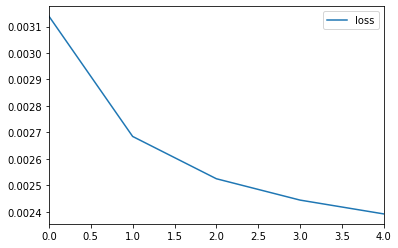

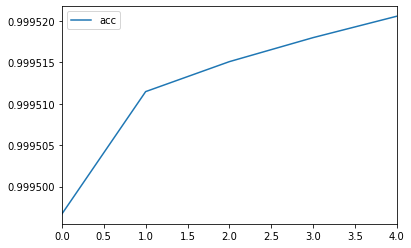

In [16]:
history_df = pd.DataFrame(history.history)
#history_df[['loss', 'val_loss']].plot()
#history_df[['acc', 'val_acc']].plot()
history_df[['loss']].plot() #Like so.
history_df[['acc']].plot()


In [17]:
# importing the load_model from keras.models
from keras.models import load_model
# It creates a HDF5 file
mtrain.save('9_project2_TT.h5')
# Deletes the model that currently exists
del mtrain
# loads the model
mtrain = load_model('9_project2_TT.h5')
mtrain.summary()


/usr/local/lib/python3.6/dist-packages/keras/engine/network.py:883: UserWarning: Layer lstm_2 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'strided_slice:0' shape=(?, 512) dtype=float32>, <tf.Tensor 'strided_slice:0' shape=(?, 512) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  '. They will not be included '


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 20, 128)      251136      input_2[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 20, 128)      251136      input_1[0][0]                    
____________________________________________________________________________________________

In [18]:
#input_validating_data= input_validating_data.reshape(input_validating_data.shape[0], input_validating_data.shape[1], 1)
#output_validating_data = output_validating_data.reshape(output_validating_data.shape[0], output_validating_data.shape[1], 1)
#import numpy as np
x_train_np = np.array(inputencodingvalidation)
y_train_np = np.array(output_validating_data)
x_test = np.expand_dims(x_train_np, axis=2)
acc = mtrain.evaluate(x=[inputencodingvalidation, inputdecodingvalidation],y= [outputdecodingvalidation], verbose=0)
print("Accuracy"+str(acc))

Accuracy[0.002499713831891616, 0.9995172135035197]


In [19]:
# method for predicting the raw input with the rawdata
def predictingrawinput(rawdata):
    # cleaning the rawdata
    clean_textt = clean_text(rawdata)
    # applying the tokenization on the cleaned text
    inputtokenization = [nltk.word_tokenize(clean_textt)]
    # The input sequence is reveersed
    inputtokenization = [inputtokenization[0][::-1]] 
    # Data transfromation on encoded input
    encodedinput = datatransformation(encoded_data, inputtokenization, 20)
    decodedinput = np.zeros(shape=(len(encodedinput), OUTPUT_LENGTH))
    # assigning the WORD_START to the decodedinput
    decodedinput[:,0] = WORD_START
    for i in range(1, OUTPUT_LENGTH):
        olayer = mtrain.predict([encodedinput, decodedinput]).argmax(axis=2)
        decodedinput[:,i] = olayer[:,i]
    # returning the olayer
    return olayer
# method for decoding the text with the decode_data and vectorization
def decodingtext(decoded_data, vectorization):
    text = ''
    # for in in vectorization
    for i in vectorization:
        # checking the if condition for i equal to zero
        if i == 0:
            break
        text += ' '
        text += decoded_data[i]
    # returning the text
    return text
# for in in the range of 20    
for i in range(20):
    # assigning the value to the sequentialindex
    sequentialindex = np.random.randint(1, len(short_qu))
    # assigning the value to the olayer
    olayer = predictingrawinput(short_qu[sequentialindex])
    # printing the question :
    print ('Questions Pls:', short_qu[sequentialindex])
    # printing the answer :
    print ('Your Answer:', decodingtext(decoded_data, olayer[0]))

Questions Pls: dongt you open your messages?
Your Answer:  i am not <UNK> .
Questions Pls: thanks for the invite.
Your Answer:  i am not <UNK> .
Questions Pls: colonel finck, are you saying someone told you not to dissect the neck?
Your Answer:  i am not <UNK> .
Questions Pls: stop it! stop it! it hurts!
Your Answer:  i am not <UNK> .
Questions Pls: wow. look at the mountains.
Your Answer:  i am not <UNK> .
Questions Pls: more... many more.
Your Answer:  i am not <UNK> .
Questions Pls: why know?
Your Answer:  i am not <UNK> .
Questions Pls: good morning, mr. bebe!
Your Answer:  i am not <UNK> .
Questions Pls: roll him over!
Your Answer:  i am not <UNK> .
Questions Pls: you look awful.
Your Answer:  i am not <UNK> .
Questions Pls: ten reasons. maybe fifteen. and also there's something in it for me.
Your Answer:  i am not <UNK> .
Questions Pls: you kidding? this is detroit. drink?
Your Answer:  i am not <UNK> .
Questions Pls: these are worth at least, i dongt know --
Your Answer:  i am n

In [20]:
# assigning the input() to the rawdata
rawdata = input()
# assigning the rawdata to the olayer
olayer = predictingrawinput(rawdata)
# printing the decodingtext
print (decodingtext(decoded_data, olayer[0]))

hi
 i am not <UNK> .
